## Implementation of Support Vector Machines Using the Hinge Loss function and Gradient Descent

### Author: Maja Garbulinska

### Date: March 2021

The below implementation of the Support Vector Machines(SVM) algorithm is based on the concept of gradient descent. 
You can learn more about it in this Medium post. Just click [here](https://towardsdatascience.com/solving-svm-stochastic-gradient-descent-and-hinge-loss-8e8b4dd91f5b)

In [19]:
# import packages
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import random
# make the notebook show animated plots
%matplotlib notebook

In [20]:

class SVM:

    def __init__(self, lr=0.001, lambd=0, iterations=100, data2D = True, saveEvery = 100, plotLims = [0, 1, 0, 1]):
        self.lr = lr
        self.lambd = lambd
        self.iterations = iterations
        self.data2D = data2D
        self.saveEvery = saveEvery
        self.plotLims = plotLims
        
        # for ploting
        if self.data2D == True:
            self.b = 0
            self.w = np.array([0.01]*2)
            
    def fit(self, X, y):
        self.X = X
        self.y = y
           
        if self.data2D != True:
            self.w = np.array([0.005]*2)*X.shape[1]
            self.b = 0
        else:
            # create lists with line values for ploting
            ylist = [[[self.getValue(self.plotLims[0], 0), self.getValue(self.plotLims[1], 0)],
                      [self.getValue(self.plotLims[0], 1), self.getValue(self.plotLims[1], 1)],
                      [self.getValue(self.plotLims[0], -1), self.getValue(self.plotLims[1], -1)]]]

            titles = [self.getTitle(iteration = 0)]
        
        # iterate to update the weights
        for i in range(1, self.iterations+1):  
            for idx, x in enumerate(X):
                if y[idx] * (np.dot(x, self.w) - self.b) >= 1:
                    self.w -= self.lr * (2 * self.lambd * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambd * self.w - np.dot(x, y[idx]))
                    self.b -= self.lr * y[idx]
            if i%self.saveEvery==0 and self.data2D == True:
                # append new values of the hyperplace for the separator and the margins
                ylist.append([[self.getValue(self.plotLims[0], j), self.getValue(self.plotLims[1], j)] for j in [0,1,-1]])
                titles.append(self.getTitle(iteration = i))

                self.ylist = ylist 
                self.titles = titles

    def getEquation(self):
        self.a = -(self.w[0]/self.w[1])
        self.m = -(self.b/self.w[1])
        eq = "{} + {}*x1 = x2".format(self.m, self.a)
        return(eq)
    
    def getTitle(self, iteration):
        # get equation the equation of the line and the iteration info
        self.getEquation()
        tit = """Support Vector Machines with Hinge Loss Stochastic Gradient Descent
        Equation Of The Trained Separator:
        {} + {}*x1 = x2
        Iteration: {}""".format(self.m, self.a, iteration)
        return(tit)
    
    def getValue(self, x1, k):
        # get value of the hyperplane at specific x1
        return((-self.w[0] * x1 + self.b + k) / self.w[1])
        
    def animation(self, interval, savePath = None):
        
        # get the limits
        lims = self.plotLims
        
        # define the plot
        fig = plt.figure(figsize=(5,5))
        # make the plot square
        ax = fig.add_subplot(aspect=1) 
        sns.scatterplot(x = self.X[:,0], y = self.X[:,1], hue = self.y, palette=['plum','teal'], alpha = 0.8)
        ax.legend(loc = "upper left", labels = ["Group 1", "Group 2"])
        ax.grid(b = True, color = 'grey', linewidth=1.0, alpha = 0.1)
        # limit plots axes
        plt.axis(lims)
        # define lines
        line, = ax.plot([],[], 'b:')
        lineM1, = ax.plot([], [], 'r')
        lineM2, = ax.plot([], [], 'r')
        # define labels for the axes
        ax.update({'xlabel':'x1', 'ylabel':'x2'})
        
        
        lastPlotInd = len(self.ylist) - 1
        selfylist = self.ylist # avoids crashing
        
        def init():
            line.set_data([lims[0], lims[1]], selfylist[lastPlotInd][0])
            lineM1.set_data([lims[0], lims[1]], selfylist[lastPlotInd][1])
            lineM2.set_data([lims[0], lims[1]], selfylist[lastPlotInd][2])
            ax.set_title(self.titles[lastPlotInd], fontsize = 8) 
            pass
        
        def update(num, selfylist, lims):
            line.set_data([lims[0], lims[1]], selfylist[num][0])
            lineM1.set_data([lims[0], lims[1]], selfylist[num][1])
            lineM2.set_data([lims[0], lims[1]], selfylist[num][2])
            ax.set_title(self.titles[num], fontsize = 8) 
            pass
    
        ani = animation.FuncAnimation(fig, update, len(self.ylist),
                                      init_func=init, fargs=[selfylist, lims],
                                      interval=interval, blit=False)
        
        if savePath != None:
            plt.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg' # change to where your ffmpeg is
            writervideo = animation.FFMpegWriter(fps=60) 
            ani.save(savePath , writer=writervideo)
        
        return(ani)

    def predict(self, X):
        return(np.sign(np.dot(X, self.w) - self.b))
    

In [21]:
# define data
random.seed(10)
n = 200
x1 = np.random.random_sample((n,)) *5
x2 = np.random.random_sample((n,)) *4.5
condition = x2 - x1 > 0.1
y = np.ones(n)
y[condition] = -1.
x2[condition] = x2[condition] + 0.3

X = np.vstack((x1,x2)).T # feature matrix

<IPython.core.display.Javascript object>


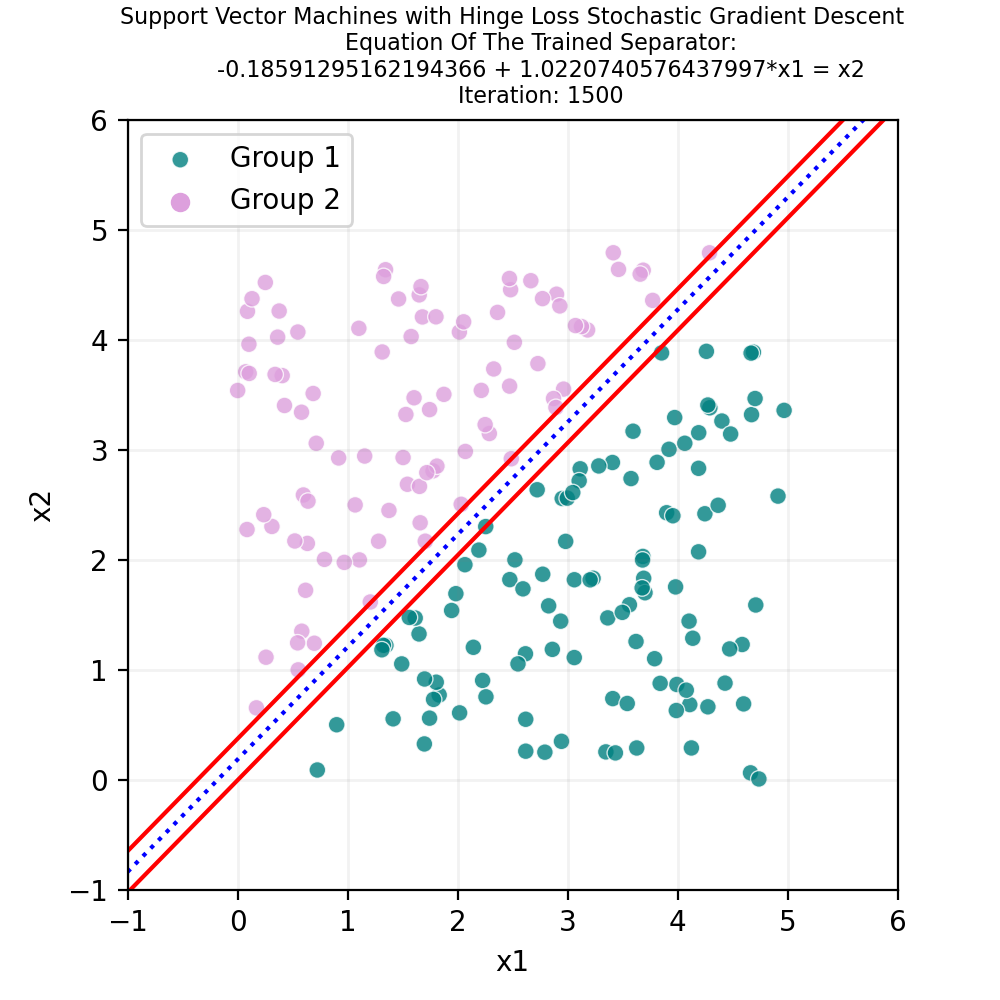

In [27]:
clf = SVM(lr = 0.007, iterations = 1500, lambd = 0.0, saveEvery = 1, plotLims = [-1, 6, -1, 6]) 
clf.fit(X, y)
#clf.animation(interval = 1, savePath = "/Users/majagarbulinska/animation.mp4")
ani = clf.animation(interval = 1)